In [46]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
from sklearn import datasets, model_selection
from tqdm import tqdm
from lab2_utils import *

## 1.D Data Generation

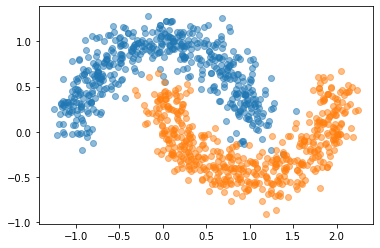

In [47]:
X, y = create_random_data(n_samples=1000, noise_level=0.15, dataset="moons", seed=932)
plot_dataset(X, y)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [49]:
def binary_classif_error(y_true, y_pred):
    return np.mean(np.sign(y_pred) != y_true)

In [50]:
linear_model = Ridge(alpha = 0.1)
linear_model.fit(X_train, y_train)
linear_err = binary_classif_error(y_test, linear_model.predict(X_test))
print(linear_err)

0.11


## 1.E Choose Kernel and Kernel Parameters

In [51]:
rbf_model = KernelRidge(0.01, kernel="rbf", gamma=0.1)
rbf_model.fit(X_train, y_train)
rbf_err = binary_classif_error(y_test, rbf_model.predict(X_test))
print(rbf_err)

0.02


In [52]:
# 1. Change the regularization parameter gamma
gamma_values = np.linspace(1e-3, 5e2, num=20)
test_errors = []

for gamma in gamma_values: 
    # TODO: Create the model and compute the test predictions
    rbf_model = KernelRidge(alpha = 1, kernel="rbf", gamma=gamma)
    rbf_model.fit(X_train, y_train)
    test_preds = rbf_model.predict(X_test)
    test_errors.append(binary_classif_error(y_test, test_preds))

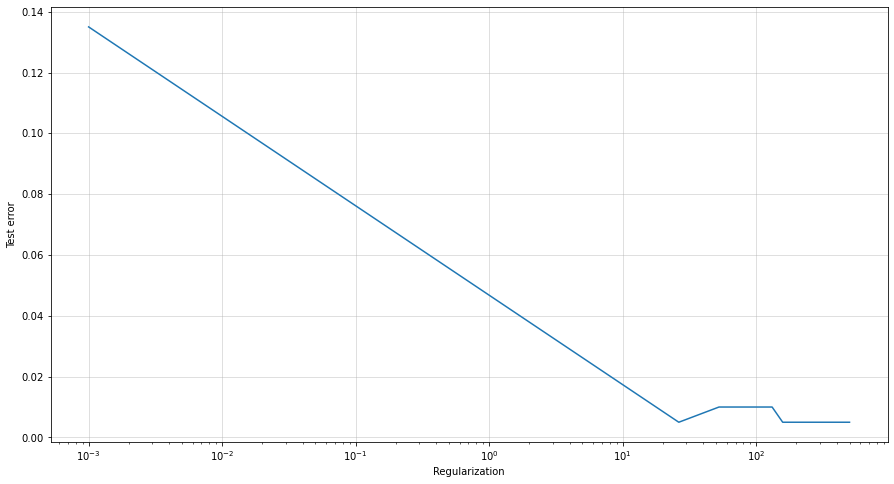

In [53]:
fig, ax = plt.subplots(figsize = (15,8))
#reg_values_comb = np.transpose([np.tile(alpha_values, len(gamma_values)), np.repeat(gamma_values, len(alpha_values))])
ax.semilogx(gamma_values, test_errors)
ax.set_xlabel("Regularization")
ax.set_ylabel("Test error");
ax.grid(alpha = 0.5);

In [54]:
# 1. Change the regularization parameter alpha
alpha_values = np.linspace(1e-4, 5e3, num=20)
gamma = gamma_values[-1]
test_errors = []
for alpha in tqdm(alpha_values):
#for gamma in gamma_values: 
    # TODO: Create the model and compute the test predictions
    rbf_model = KernelRidge(alpha, kernel="rbf", gamma=gamma)
    rbf_model.fit(X_train, y_train)
    test_preds = rbf_model.predict(X_test)
    test_errors.append(binary_classif_error(y_test, test_preds))

100%|██████████| 20/20 [00:00<00:00, 60.15it/s]


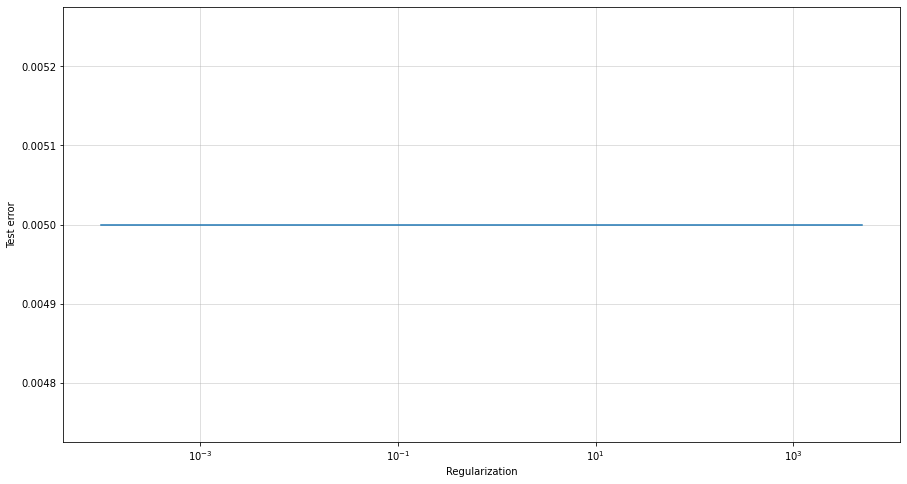

In [55]:
fig, ax = plt.subplots(figsize = (15,8))
#reg_values_comb = np.transpose([np.tile(alpha_values, len(gamma_values)), np.repeat(gamma_values, len(alpha_values))])
ax.semilogx(alpha_values, test_errors)
ax.set_xlabel("Regularization")
ax.set_ylabel("Test error");
ax.grid(alpha = 0.5);

## Cross Validation
### Combined GridSearchCV

In [56]:
from sklearn.metrics import make_scorer

param_grid = {
    "alpha": np.linspace(1e-4, 5, num=20), 
    "gamma": np.linspace(1e-3, 5e2, num=20),
}


model = KernelRidge(kernel = "rbf")
rbf_gs = model_selection.GridSearchCV(model, param_grid, n_jobs = -1, scoring = make_scorer(binary_classif_error, greater_is_better=False))

In [57]:
rbf_gs.fit(X_train, y_train)

GridSearchCV(estimator=KernelRidge(kernel='rbf'), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-04, 2.63252632e-01, 5.26405263e-01, 7.89557895e-01,
       1.05271053e+00, 1.31586316e+00, 1.57901579e+00, 1.84216842e+00,
       2.10532105e+00, 2.36847368e+00, 2.63162632e+00, 2.89477895e+00,
       3.15793158e+00, 3.42108421e+00, 3.68423684e+00, 3.94738947e+00,
       4.21054211e+00, 4.4736947...
                         'gamma': array([1.00000000e-03, 2.63167368e+01, 5.26324737e+01, 7.89482105e+01,
       1.05263947e+02, 1.31579684e+02, 1.57895421e+02, 1.84211158e+02,
       2.10526895e+02, 2.36842632e+02, 2.63158368e+02, 2.89474105e+02,
       3.15789842e+02, 3.42105579e+02, 3.68421316e+02, 3.94737053e+02,
       4.21052789e+02, 4.47368526e+02, 4.73684263e+02, 5.00000000e+02])},
             scoring=make_scorer(binary_classif_error, greater_is_better=False))

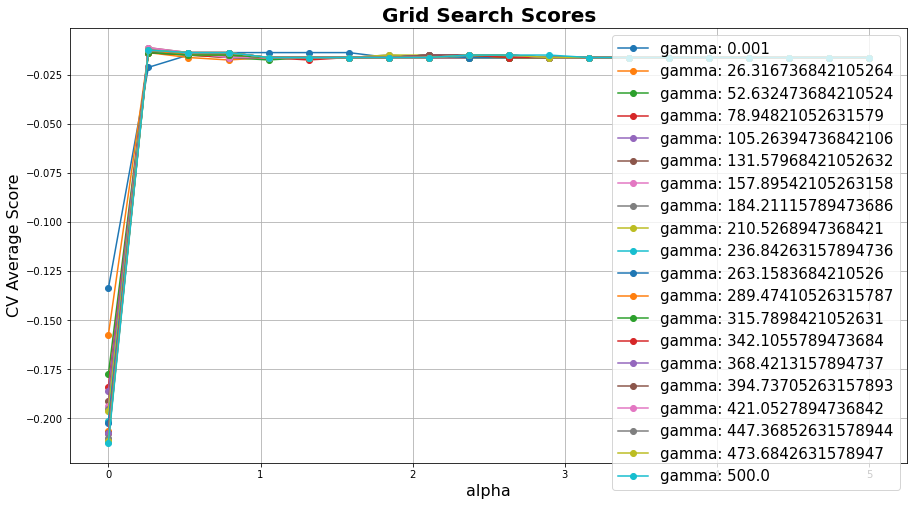

In [58]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    
    fig, ax = plt.subplots(1,1, figsize = (15, 8))
    

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))
        

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

# Calling Method 
plot_grid_search(rbf_gs.cv_results_, param_grid["alpha"], param_grid["gamma"], 'alpha', 'gamma')